# Twinks detection

In [4]:
import json
import collections, copy
import re
import string
import itertools

## Load data and finding most common words and same comments

In [5]:
with open('2022.jsonl') as f:
    data = [json.loads(line) for line in f]
    all_words = []
    for line in data:
        # exclude punctuation and spaces
        line['message'] = re.sub(r'[^\w\s]', '', line['message'])
        for word in line['message'].lower().split():
            if word == ' ' or word == '':
                continue
            all_words.append(word.lower())
            
# count most common words
most_common = collections.Counter(all_words).most_common(100) # common words like 'the', 'and', 'to' etc.
print(most_common)
# find trivial words like 'done', 'thanks', 'hello' etc.
trivial_words = [] # words that are not common but are not informative like 'done', 'thanks', 'hello' etc.
for word in most_common:
    if len(word[0]) > 3:
        trivial_words.append(word)
print("\n")
print("triv:  ", trivial_words)





[('the', 18952), ('to', 11303), ('in', 8094), ('i', 7531), ('a', 7309), ('is', 7289), ('this', 6652), ('it', 6441), ('and', 6132), ('that', 5560), ('for', 5142), ('of', 4444), ('you', 3928), ('be', 3895), ('not', 3333), ('but', 2820), ('if', 2721), ('with', 2673), ('at', 2470), ('as', 2288), ('on', 2239), ('so', 2154), ('have', 2080), ('done', 1806), ('we', 1721), ('would', 1707), ('just', 1575), ('are', 1550), ('here', 1536), ('can', 1512), ('should', 1509), ('patch', 1478), ('change', 1431), ('do', 1422), ('or', 1417), ('was', 1405), ('from', 1380), ('thanks', 1355), ('its', 1308), ('one', 1281), ('there', 1271), ('an', 1213), ('use', 1154), ('will', 1139), ('only', 1133), ('see', 1133), ('no', 1132), ('which', 1132), ('now', 1122), ('me', 1113), ('could', 1088), ('some', 1070), ('also', 1069), ('dont', 1054), ('test', 1048), ('what', 1029), ('const', 1020), ('code', 1000), ('please', 993), ('when', 989), ('all', 980), ('like', 974), ('by', 973), ('then', 960), ('think', 918), ('my',

In [6]:
def delete_common_words(message, common):
    comm = [word_ for word_, count in common]
    message.translate(str.maketrans('', '', string.punctuation))
    words = message.lower().split()
    for w in words:
        if w in comm:
            words.remove(w)
    return ' '.join(words)

In [7]:
# lets create a dictionary key: message where delete common words and punctuation, value: list of author ids
groups = collections.defaultdict(list)

data_for_freq = copy.deepcopy(data)  # we need to save data for frequency dictionary

for line in data:
    line['message'] = delete_common_words(line['message'], trivial_words)
    line['message'] = delete_common_words(line['message'], most_common) # do we need this?
    if line['author_id'] not in groups[line['message']]:
        groups[line['message']].append(line['author_id'])
print(groups)

defaultdict(<class 'list'>, {'ok modify message gerrit do i to modify only message do git amend followed a git push': [1000697], 'pls a onesentence summary the first commit message': [1000321], 'rest separated the summary a empty must split 70 characters separate lines note its explained the getinvolved wiki httpswikidocumentfoundationorgdevelopmentgetinvolved4_submit_the_patch': [1000994], 'may right': [1000994], 'not big fan stylistic changes instead if even less introduction tabs instead spaces indentation really be usrbinenv bash tabwidth 4 indenttabsmode nil top for the rest sound me simpler better the complex stuff not useduseful': [1000003], 'point taken stylistic changes unless doing something seriously wrong top script already say usrbinenv bash tabwidth 4 indenttabsmode nil take look thismy message the script the developer mailing list you havent already are few things attention httpslistsfreedesktoporgarchiveslibreoffice2022june089020html the review': [1000697], 'yes emacs t

In [8]:
large_groups = set()

for accounts in groups.values():
    if len(accounts) > 1:
        large_groups.add(tuple(accounts)) # tuple is hashable and can be used as a key in a dictionary
print(large_groups)

{(1000135, 1000037), (1000083, 1000994), (1000295, 1001124, 1002002), (1000447, 1002869, 1000664), (1003854, 1002002, 1000083, 1000166), (1000664, 1003512, 1001306), (1000994, 1000092, 1001318), (1002862, 1003042, 1003542), (1000043, 1003889, 1000002, 1000013, 1000779, 1003877, 1003854, 1000447, 1003564, 1003876, 1001613, 1000179, 1002115, 1001318, 1000154, 1000789, 1000804, 1000023, 1001501, 1001582, 1002951, 1000562, 1002376, 1000161, 1002002, 1002314, 1003758, 1000549, 1000083, 1003752, 1003841, 1001211, 1001615, 1002268, 1000022, 1003573, 1000664, 1000119, 1000135, 1001901, 1000007, 1000994, 1000166, 1000062, 1003667, 1002210, 1001002, 1002862, 1003025, 1002266, 1003543, 1000868, 1003661, 1000865, 1000871, 1003762, 1003714, 1000947, 1003812, 1000027, 1000638, 1002525, 1003771, 1003558, 1003612, 1003719, 1000750, 1002306, 1000295, 1003336, 1003606, 1003764, 1000045, 1003644, 1003732, 1003748, 1000996, 1000028, 1003730, 1003708, 1000006, 1002429, 1003655, 1003512, 1003557, 1000321, 1

In [9]:
# lets find all possible combinations of accounts in large_groups
# and count how many times they appear together

In [10]:
# find all possible combinations of accounts in large_groups
print("all possible combinations of accounts in large_groups")
all_combinations = []
for group in large_groups:
    all_combinations.extend(list(itertools.combinations(group, 2)))
print(all_combinations)


all possible combinations of accounts in large_groups
[(1000135, 1000037), (1000083, 1000994), (1000295, 1001124), (1000295, 1002002), (1001124, 1002002), (1000447, 1002869), (1000447, 1000664), (1002869, 1000664), (1003854, 1002002), (1003854, 1000083), (1003854, 1000166), (1002002, 1000083), (1002002, 1000166), (1000083, 1000166), (1000664, 1003512), (1000664, 1001306), (1003512, 1001306), (1000994, 1000092), (1000994, 1001318), (1000092, 1001318), (1002862, 1003042), (1002862, 1003542), (1003042, 1003542), (1000043, 1003889), (1000043, 1000002), (1000043, 1000013), (1000043, 1000779), (1000043, 1003877), (1000043, 1003854), (1000043, 1000447), (1000043, 1003564), (1000043, 1003876), (1000043, 1001613), (1000043, 1000179), (1000043, 1002115), (1000043, 1001318), (1000043, 1000154), (1000043, 1000789), (1000043, 1000804), (1000043, 1000023), (1000043, 1001501), (1000043, 1001582), (1000043, 1002951), (1000043, 1000562), (1000043, 1002376), (1000043, 1000161), (1000043, 1002002), (1000

## frequency dictionary for each author

In [11]:
freq_dict = {}
print(data_for_freq)
for line in data_for_freq:
    if line['author_id'] not in freq_dict:
        freq_dict[line['author_id']] = collections.Counter()
    # delete punctuation and spaces
    line['message'].translate(str.maketrans('', '', string.punctuation))
    freq_dict[line['author_id']].update(line['message'].lower().split())
    
print(freq_dict)

[{'message': 'Ok Can I modify the commit message here in Gerrit or do I need to modify the commit only the message then and then do a git commit amend a followed by a git push ', 'timestamp': '2022-06-10 09:00:47.000000000', 'author_id': 1000697}, {'message': 'Pls add a onesentence summary in the first line of your commit message ', 'timestamp': '2022-06-10 04:47:33.000000000', 'author_id': 1000321}, {'message': ' and the rest separated from the summary by a one empty line must be split to 70 characters separate lines\n\nNote how its explained in the GetInvolved wiki\n\nhttpswikidocumentfoundationorgDevelopmentGetInvolved4_Submit_the_patch', 'timestamp': '2022-06-10 06:10:03.000000000', 'author_id': 1000994}, {'message': 'You may do that right here', 'timestamp': '2022-06-10 09:18:57.000000000', 'author_id': 1000994}, {'message': 'Im not a big fan of stylistic changes like\nif\nthen\n\ninstead if\nif   then\n\neven less of the introduction of tabs instead of spaces for indentation\n\nr

In [12]:
def find_suspicious(dictionary, coefficient):
    suspicious = []
    count_common = 10
    for account1, account2 in itertools.combinations(dictionary.keys(), 2):
        # print(account1, account2)
        # check if we already checked this pair
        if (account1, account2) in suspicious or (account2, account1) in suspicious:
            continue
        # check count of all words
        if sum(dictionary[account1].values()) < 3 or sum(dictionary[account2].values()) < 3:
            continue
        top_words1 = [word1 for word1, count in dictionary[account1].most_common(count_common)]
        top_words2 = [word1 for word1, count in dictionary[account2].most_common(count_common)]
        common_word = len(set(top_words1) & set(top_words2))
        max_len = max(len(top_words1), len(top_words2))
        # print("%.9f" % (common_word / max_len))
        if common_word / max_len >= coefficient:
            suspicious.append((account1, account2))
    return suspicious

suspicious_pairs = find_suspicious(freq_dict, 0.1)
print(suspicious_pairs)

[(1000697, 1000321), (1000697, 1000994), (1000697, 1000003), (1000697, 1000043), (1000697, 1003771), (1000697, 1000045), (1000697, 1003889), (1000697, 1001613), (1000697, 1000013), (1000697, 1002268), (1000697, 1001318), (1000697, 1000804), (1000697, 1000022), (1000697, 1000002), (1000697, 1000446), (1000697, 1000447), (1000697, 1000166), (1000697, 1000037), (1000697, 1000083), (1000697, 1000179), (1000697, 1000135), (1000697, 1000779), (1000697, 1000006), (1000697, 1001872), (1000697, 1003708), (1000697, 1000027), (1000697, 1000068), (1000697, 1003877), (1000697, 1002951), (1000697, 1003858), (1000697, 1000028), (1000697, 1003854), (1000697, 1001002), (1000697, 1000789), (1000697, 1001818), (1000697, 1003564), (1000697, 1003881), (1000697, 1002677), (1000697, 1002115), (1000697, 1000023), (1000697, 1003871), (1000697, 1001965), (1000697, 1001582), (1000697, 1000805), (1000697, 1000154), (1000697, 1003606), (1000697, 1000062), (1000697, 1001501), (1000697, 1002376), (1000697, 1002862),

In [13]:
def combine_accounts(all, susspicious):
    twinks = []
    for pair in all:
        if pair in susspicious:
            twinks.append(pair)
    return twinks

0.80 794
suspicious_pairs by coefficient: 
[(1000697, 1000321), (1000697, 1000994), (1000697, 1000447), (1000697, 1000083), (1000697, 1000135), (1000697, 1003854), (1000697, 1003871), (1000697, 1001582), (1000697, 1002862), (1000697, 1000562), (1000697, 1001124), (1000697, 1002002), (1000697, 1000549), (1000697, 1001615), (1000697, 1000130), (1000697, 1002512), (1000697, 1000750), (1000697, 1000295), (1000697, 1002778), (1000697, 1000084), (1000321, 1000994), (1000321, 1000043), (1000321, 1003771), (1000321, 1001613), (1000321, 1002268), (1000321, 1000804), (1000321, 1000022), (1000321, 1000447), (1000321, 1000083), (1000321, 1000135), (1000321, 1000027), (1000321, 1003854), (1000321, 1000789), (1000321, 1003606), (1000321, 1000062), (1000321, 1002862), (1000321, 1000030), (1000321, 1000562), (1000321, 1001124), (1000321, 1000161), (1000321, 1003758), (1000321, 1000549), (1000321, 1001615), (1000321, 1000130), (1000321, 1002512), (1000321, 1001855), (1000321, 1000880), (1000321, 100075

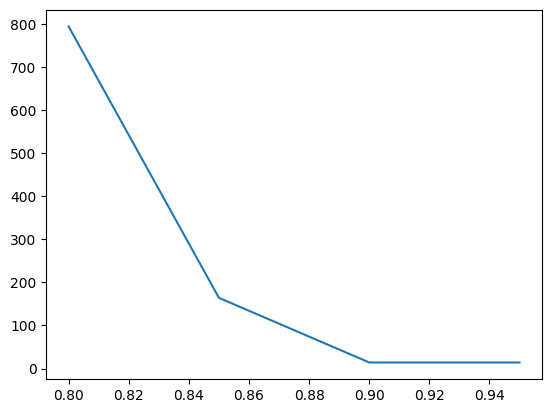

In [15]:
# we have to find coefficient for suspicious pairs to be sure that they are twinks
# lets draw a graph with coefficient on x axis and number of suspicious pairs on y axis
# use matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.8, 1, 0.05)
y = []
for i in x:
    tmp = find_suspicious(freq_dict, i)
    y.append(len(tmp))
    print("%.2f" % i, len(tmp))
    print("suspicious_pairs by coefficient: ", tmp, sep='\n')
    print(combine_accounts(all_combinations, tmp), sep='\n')
    

plt.plot(x, y)
plt.show()




## Combine all possible combinations of accounts in large_groups and suspicious_pairs

In [16]:
# combine all possible combinations of accounts in large_groups and suspicious_pairs
twinks_accounts = []
for pair in all_combinations:
    if pair in suspicious_pairs:
        twinks_accounts.append(pair)
# print(twinks_accounts)
# sort twinks_accounts by first element
twinks_accounts.sort(key=lambda x: x[0])
print(twinks_accounts)
print(combine_accounts(all_combinations, suspicious_pairs))


[(1000002, 1000779), (1000002, 1003877), (1000002, 1003854), (1000002, 1000447), (1000002, 1003564), (1000002, 1000179), (1000002, 1002115), (1000002, 1000154), (1000002, 1000789), (1000002, 1000023), (1000002, 1001501), (1000002, 1001582), (1000002, 1002951), (1000002, 1000562), (1000002, 1002376), (1000002, 1000161), (1000002, 1002002), (1000002, 1002314), (1000002, 1003758), (1000002, 1000549), (1000002, 1000083), (1000002, 1003752), (1000002, 1003841), (1000002, 1001211), (1000002, 1001615), (1000002, 1003573), (1000002, 1000664), (1000002, 1000119), (1000002, 1000135), (1000002, 1001901), (1000002, 1000007), (1000002, 1000166), (1000002, 1000062), (1000002, 1003667), (1000002, 1002210), (1000002, 1001002), (1000002, 1002862), (1000002, 1003025), (1000002, 1002266), (1000002, 1003543), (1000002, 1000868), (1000002, 1003661), (1000002, 1000865), (1000002, 1000871), (1000002, 1003714), (1000002, 1000947), (1000002, 1003812), (1000002, 1000027), (1000002, 1000638), (1000002, 1002525),